In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fibe-text-class-downsampling/__results__.html
/kaggle/input/fibe-text-class-downsampling/downsampled_df.csv
/kaggle/input/fibe-text-class-downsampling/sample_df.csv
/kaggle/input/fibe-text-class-downsampling/__notebook__.ipynb
/kaggle/input/fibe-text-class-downsampling/__output__.json
/kaggle/input/fibe-text-class-downsampling/test_df.csv
/kaggle/input/fibe-text-class-downsampling/custom.css
/kaggle/input/fibe-text-class-downsampling/__results___files/__results___8_0.png


In [5]:
import tqdm as tq

In [6]:
# error_test = '/kaggle/input/erro-test-csv/error_test.csv'

In [7]:
# error_df = pd.read_csv(error_test, sep=',', encoding='UTF-8')
# error_df.head()

In [8]:
# train_ds_path = '/kaggle/input/fibe-news-dataset/dataset/train.csv'
# test_ds_path = '/kaggle/input/fibe-news-dataset/dataset/test.csv'
# sample_path = '/kaggle/input/fibe-news-dataset/dataset/sample_submission.csv'

In [9]:
train_ds_path = '/kaggle/input/fibe-text-class-downsampling/downsampled_df.csv'
sample_path = '/kaggle/input/fibe-text-class-downsampling/sample_df.csv'


In [10]:
import time as t

In [11]:
def calculate_time(start_time,end_time):
    elapsed_time = end_time - start_time
    return f'The elapsed time is {elapsed_time} secs'

In [20]:
st = t.time()
# 697527
# train_df = pd.read_csv(train_ds_path,encoding='ISO-8859-1', nrows=200000)
train_df = pd.read_csv(train_ds_path,encoding='ISO-8859-1')
et = t.time()
calculate_time(st,et)

'The elapsed time is 1.2007684707641602 secs'

In [21]:
train_df.head()

,text,target,Word Count
0,NEW DELHI: The Times of India Mission Admissio...,academic interests,169
1,PATNA: Several educational and cultural organi...,academic interests,500
2,"MANIPAL: Departments of Pharmacology, KMC Mani...",academic interests,331
3,MUMBAI: The state education department has tol...,academic interests,269
4,Punjab Public Service Commission (PPSC) has an...,academic interests,140


In [22]:
train_df.target.value_counts()

target
academic interests                           5848
books and literature                         4041
healthy living                               3093
careers                                      3025
news and politics                            3018
shopping                                     2946
style and fashion                            2912
family and relationships                     2893
business and finance                         2801
automotives                                  2798
pharmaceuticals, conditions, and symptoms    2659
arts and culture                             2634
sports                                       2453
pets                                         2412
hobbies and interests                        2393
real estate                                  2382
food and drinks                              2342
home and garden                              2300
video gaming                                 2294
movies                                     

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

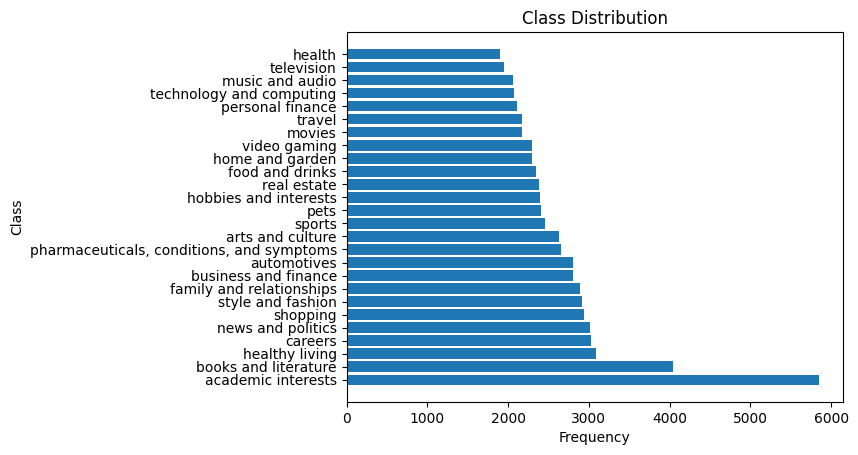

In [24]:
# Set the figure size to increase the width
# plt.figure(figsize=(12, 6))  # Adjust the width (12 inches) as needed

# Count the occurrences of each class
class_counts = train_df['target'].value_counts()

# Create a horizontal bar plot
plt.barh(class_counts.index, class_counts)

# Customize the plot
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [25]:
classes = train_df['target'].unique()
len(classes), classes

(26,
 array(['academic interests', 'arts and culture', 'automotives',
        'books and literature', 'business and finance', 'careers',
        'family and relationships', 'food and drinks', 'health',
        'healthy living', 'hobbies and interests', 'home and garden',
        'movies', 'music and audio', 'news and politics',
        'personal finance', 'pets',
        'pharmaceuticals, conditions, and symptoms', 'real estate',
        'shopping', 'sports', 'style and fashion',
        'technology and computing', 'television', 'travel', 'video gaming'],
       dtype=object))

In [26]:
train_df.describe(include='object')

,text,target
count,69681,69681
unique,69680,26
top,petmeds - your trusted pet health expert take ...,academic interests
freq,2,5848


* 26 unique categories in the target ie 26 classes.
* the text are not unique and have repetition. So we have to check 
    * what are the repating texts are?
    * for each repeating texts, are the target classes same?

In [27]:
train_df.describe()

,Word Count
count,69681.000000
mean,306.179461
std,137.797726
min,100.000000
25%,179.000000
50%,292.000000
75%,445.000000
max,500.000000


In [28]:
duplicate_rows = train_df[train_df['text'].duplicated()]
duplicate_rows

,text,target,Word Count
33666,petmeds - your trusted pet health expert take ...,hobbies and interests,131


# Tokenization

In [29]:
from datasets import Dataset,DatasetDict,ClassLabel

In [30]:
ds = Dataset.from_pandas(train_df)

In [31]:
ds

Dataset({
    features: ['text', 'target', 'Word Count'],
    num_rows: 69681
})

In [32]:
feat_news_cat = ClassLabel(num_classes = len(classes),names=classes.tolist())

In [33]:
ds = ds.cast_column("target", feat_news_cat)

Casting the dataset:   0%|          | 0/69681 [00:00<?, ? examples/s]

In [34]:
ds.features

{'text': Value(dtype='string', id=None),
 'target': ClassLabel(names=['academic interests', 'arts and culture', 'automotives', 'books and literature', 'business and finance', 'careers', 'family and relationships', 'food and drinks', 'health', 'healthy living', 'hobbies and interests', 'home and garden', 'movies', 'music and audio', 'news and politics', 'personal finance', 'pets', 'pharmaceuticals, conditions, and symptoms', 'real estate', 'shopping', 'sports', 'style and fashion', 'technology and computing', 'television', 'travel', 'video gaming'], id=None),
 'Word Count': Value(dtype='int64', id=None)}

In [35]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [36]:
# model_nm = 'microsoft/deberta-v3-small'
model_nm = 'distilbert/distilbert-base-uncased'

In [37]:
tokz = AutoTokenizer.from_pretrained(model_nm)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [38]:
train_df.iloc[0,0], train_df.iloc[0,1], train_df.iloc[0,2]


("NEW DELHI: The Times of India Mission Admission will organize an exclusive seminar to help undergraduate aspirants to make right career decisions. The seminar will bring together an experienced panel of speakers on June 22 at India International Centre, Max Mueller Marg.  The seminar will start at 10am and the principal of Shri Ram College of Commerce will speak about higher education in general and Delhi University in particular. This will be followed by the deputy dean of students' welfare, DU, Dinesh Varshney, speaking on entering college life.  For more specific information on opportunities in the commerce stream, aspirants will get to interact with J P Sharma, dean, department of commerce, DU. There will also be a career counselling session by Pervin Malhotra while Usha Albuquerque will speak on emerging careers. H C Pokhriyal, executive director, School of Open Learning, will speak on distance learning while career counsellor Anupam Srivastava will speak about universities othe

In [39]:
tokz.tokenize(train_df.iloc[0,0])

['new',
 'delhi',
 ':',
 'the',
 'times',
 'of',
 'india',
 'mission',
 'admission',
 'will',
 'organize',
 'an',
 'exclusive',
 'seminar',
 'to',
 'help',
 'undergraduate',
 'as',
 '##pi',
 '##rant',
 '##s',
 'to',
 'make',
 'right',
 'career',
 'decisions',
 '.',
 'the',
 'seminar',
 'will',
 'bring',
 'together',
 'an',
 'experienced',
 'panel',
 'of',
 'speakers',
 'on',
 'june',
 '22',
 'at',
 'india',
 'international',
 'centre',
 ',',
 'max',
 'mueller',
 'mar',
 '##g',
 '.',
 'the',
 'seminar',
 'will',
 'start',
 'at',
 '10',
 '##am',
 'and',
 'the',
 'principal',
 'of',
 'shri',
 'ram',
 'college',
 'of',
 'commerce',
 'will',
 'speak',
 'about',
 'higher',
 'education',
 'in',
 'general',
 'and',
 'delhi',
 'university',
 'in',
 'particular',
 '.',
 'this',
 'will',
 'be',
 'followed',
 'by',
 'the',
 'deputy',
 'dean',
 'of',
 'students',
 "'",
 'welfare',
 ',',
 'du',
 ',',
 'din',
 '##esh',
 'var',
 '##sh',
 '##ney',
 ',',
 'speaking',
 'on',
 'entering',
 'college',
 'li

In [40]:
ds

Dataset({
    features: ['text', 'target', 'Word Count'],
    num_rows: 69681
})

In [41]:
def tok_func(x): return tokz(x["text"],truncation=True,max_length=512)

## Tokenized dataset

In [42]:
tok_ds = ds.map(tok_func, batched=True, batch_size=10000, num_proc=2)

Map (num_proc=2):   0%|          | 0/69681 [00:00<?, ? examples/s]

In [43]:
ds, tok_ds

(Dataset({
     features: ['text', 'target', 'Word Count'],
     num_rows: 69681
 }),
 Dataset({
     features: ['text', 'target', 'Word Count', 'input_ids', 'attention_mask'],
     num_rows: 69681
 }))

In [44]:
row = tok_ds[0]
row['text'], row['input_ids']

("NEW DELHI: The Times of India Mission Admission will organize an exclusive seminar to help undergraduate aspirants to make right career decisions. The seminar will bring together an experienced panel of speakers on June 22 at India International Centre, Max Mueller Marg.  The seminar will start at 10am and the principal of Shri Ram College of Commerce will speak about higher education in general and Delhi University in particular. This will be followed by the deputy dean of students' welfare, DU, Dinesh Varshney, speaking on entering college life.  For more specific information on opportunities in the commerce stream, aspirants will get to interact with J P Sharma, dean, department of commerce, DU. There will also be a career counselling session by Pervin Malhotra while Usha Albuquerque will speak on emerging careers. H C Pokhriyal, executive director, School of Open Learning, will speak on distance learning while career counsellor Anupam Srivastava will speak about universities othe

In [45]:
# type(tokz), tokz.vocab['▁courses']

In [46]:
tok_ds = tok_ds.rename_columns({'target':'labels'})  # check the model to know if it takes label or labels

# Test and validation sets

## Test set - how are we performing on the metrics¶

In [47]:
test_ds_path = '/kaggle/input/fibe-text-class-downsampling/test_df.csv'

In [48]:
eval_df = pd.read_csv(test_ds_path, encoding='ISO-8859-1')

In [49]:
eval_df.describe(include='object')

,text,Index
count,174382,174382
unique,174316,174382
top,"introduction as a data scientist at ibm, you w...",Article_174381
freq,8,1


In [50]:
eval_df.describe()

,Word Count
count,174382.000000
mean,305.557902
std,137.787736
min,100.000000
25%,179.000000
50%,290.000000
75%,444.000000
max,500.000000


In [51]:
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True, batch_size=10000, num_proc=2)

Map (num_proc=2):   0%|          | 0/174382 [00:00<?, ? examples/s]

In [52]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [53]:
import evaluate

In [54]:
clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])

In [55]:
clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'precision': 1.0,
 'recall': 0.5}

In [56]:
import numpy as np

In [57]:
# def compute_metrics(eval_pred):

#     predictions, labels = eval_pred

#     predictions = np.argmax(predictions, axis=1)

#     return clf_metrics.compute(predictions=predictions, references=labels, average="weighted")

## WORKING COMPUTE_METRICS
# def compute_metrics(eval_pred):
#     metric1 = evaluate.load("precision")
#     metric2 = evaluate.load("recall")
#     metric3 = evaluate.load("f1")
#     metric4 = evaluate.load("accuracy")

#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)

#     precision = metric1.compute(predictions=predictions, references=labels,average="weighted")["precision"]
#     recall = metric2.compute(predictions=predictions, references=labels,average="weighted")["recall"]
#     f1 = metric3.compute(predictions=predictions, references=labels,average="weighted")["f1"]
#     accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]

#     print(f'"precision": {precision}, "recall": {recall}, "f1": {f1},"accuracy": {accuracy}')
    
    
#     return {"precision": precision, "recall": recall, "f1": f1,"accuracy": accuracy}


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [59]:
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

In [60]:
# # this evaluation metrics would be a problem while training

# def score_f1(eval_pred):
#     actual, predicted = eval_pred
#     f1 = f1_score(actual, predicted, average='weighted')
#     score = max(0, 100 * f1)
#     return {'f1_score': score}

## validation set - how we are doing with the training of model

In [61]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
        num_rows: 52260
    })
    test: Dataset({
        features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
        num_rows: 17421
    })
})

# Training model

## For dynamic padding

In [62]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokz, padding= True)


In [63]:
dds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
        num_rows: 52260
    })
    test: Dataset({
        features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
        num_rows: 17421
    })
})

In [64]:
dds['train'][0]


{'text': 'MYSURU: Karnataka minister for endowments or muzrai T Parameshwar Naik on Saturday announced that the state government would assume the administration of the Sulwadi Maramma temple in Kollegal taluk, Chamarajanagar, where 17 devotees died after consuming poison-laced prasadam last month.  Naik, who visited the temple on Saturday, said that following th e tragedy at the temple, the government had deliberated over the matter and concluded that it was best to bring the place of worship under the purview of the muzrai department.  The trustees of the temple, the local MLA and district administration have arrived at a consensus about the subject and want the temple to be managed by the government. A final decision on the issue will be taken soon,? said Naik, adding that the government would also take a call on freezing the temples account and money in the hundi.  The minister then paid a visit to the Lambani Tanda in Kotepode in Sulwadi. He met family members of Maili Bai and Kris

In [65]:
dds['train'].features

{'text': Value(dtype='string', id=None),
 'labels': ClassLabel(names=['academic interests', 'arts and culture', 'automotives', 'books and literature', 'business and finance', 'careers', 'family and relationships', 'food and drinks', 'health', 'healthy living', 'hobbies and interests', 'home and garden', 'movies', 'music and audio', 'news and politics', 'personal finance', 'pets', 'pharmaceuticals, conditions, and symptoms', 'real estate', 'shopping', 'sports', 'style and fashion', 'technology and computing', 'television', 'travel', 'video gaming'], id=None),
 'Word Count': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [66]:
samples = dds['train'][:10]
samples = {k: v for k, v in samples.items() if k not in ['text','Word Count']}
[len(x) for x in samples["input_ids"]]

[427, 170, 368, 412, 278, 512, 224, 174, 160, 352]

In [67]:
dds['train'][0]

{'text': 'MYSURU: Karnataka minister for endowments or muzrai T Parameshwar Naik on Saturday announced that the state government would assume the administration of the Sulwadi Maramma temple in Kollegal taluk, Chamarajanagar, where 17 devotees died after consuming poison-laced prasadam last month.  Naik, who visited the temple on Saturday, said that following th e tragedy at the temple, the government had deliberated over the matter and concluded that it was best to bring the place of worship under the purview of the muzrai department.  The trustees of the temple, the local MLA and district administration have arrived at a consensus about the subject and want the temple to be managed by the government. A final decision on the issue will be taken soon,? said Naik, adding that the government would also take a call on freezing the temples account and money in the hundi.  The minister then paid a visit to the Lambani Tanda in Kotepode in Sulwadi. He met family members of Maili Bai and Kris

In [68]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}


{'labels': torch.Size([10]),
 'input_ids': torch.Size([10, 512]),
 'attention_mask': torch.Size([10, 512])}

## Id <> labels Mapping

In [69]:
id2label = {}
label2id = {}

for i, label in enumerate(classes):
    id2label[i] = label
    label2id[label] = i

print(f'id2label: \n \n {id2label} \n\n  label2id: \n\n  {label2id}')

id2label: 
 
 {0: 'academic interests', 1: 'arts and culture', 2: 'automotives', 3: 'books and literature', 4: 'business and finance', 5: 'careers', 6: 'family and relationships', 7: 'food and drinks', 8: 'health', 9: 'healthy living', 10: 'hobbies and interests', 11: 'home and garden', 12: 'movies', 13: 'music and audio', 14: 'news and politics', 15: 'personal finance', 16: 'pets', 17: 'pharmaceuticals, conditions, and symptoms', 18: 'real estate', 19: 'shopping', 20: 'sports', 21: 'style and fashion', 22: 'technology and computing', 23: 'television', 24: 'travel', 25: 'video gaming'} 

  label2id: 

  {'academic interests': 0, 'arts and culture': 1, 'automotives': 2, 'books and literature': 3, 'business and finance': 4, 'careers': 5, 'family and relationships': 6, 'food and drinks': 7, 'health': 8, 'healthy living': 9, 'hobbies and interests': 10, 'home and garden': 11, 'movies': 12, 'music and audio': 13, 'news and politics': 14, 'personal finance': 15, 'pets': 16, 'pharmaceuticals,

## Training our model

In [70]:
from transformers import TrainingArguments,Trainer

In [71]:
bs = 30
epochs = 2

In [72]:
# lr = 0.1
lr = 2e-2

In [73]:
args = TrainingArguments('outputs', 
                         learning_rate=lr, 
                         warmup_ratio=0.1, 
                         lr_scheduler_type='cosine',
                         overwrite_output_dir=True, # This reduces the amt of disk space that gets used.                         
                         fp16=True,
#                          evaluation_strategy="epoch",
                         eval_strategy="epoch",
                         per_device_train_batch_size=bs,
                         per_device_eval_batch_size=bs*2,
                         num_train_epochs=epochs, 
                         weight_decay=0.01, 
                         report_to='none')

In [74]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, 
                                                           num_labels=len(classes),
                                                          id2label=id2label, 
                                                           label2id=label2id)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
trainer = Trainer(model = model, 
                  args = args, 
                  train_dataset=dds['train'], 
                  eval_dataset=dds['test'],
                  tokenizer=tokz,
                  data_collator = data_collator, 
                  compute_metrics=compute_metrics)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [76]:
start_time = t.time()
trainer.train();
end_time = t.time()
calculate_time(start_time,end_time)


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,3.225400,3.228622,0.006635,0.081453,0.012270,0.081453
2,3.224700,3.225288,0.006635,0.081453,0.012270,0.081453


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'The elapsed time is 3128.600397348404 secs'

In [79]:
trainer.save_model("./first_model")

In [3]:
from huggingface_hub import notebook_login

In [82]:
# import os
# os.environ['WANDB_DISABLED'] = 'false'

In [2]:
notebook_login()

In [ ]:
trainer.push_to_hub("pknayak/bert-news-class")

# Inferences on the test data

## Loading model fomr HUB

In [12]:
from huggingface_hub import notebook_login

In [13]:
notebook_login()

In [14]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import AutoTokenizer 
# from transformers import default_data_collator
from transformers import DataCollatorWithPadding

In [15]:
model_path= 'pknayak/bert-news-class'

In [16]:
tokenizer = AutoTokenizer.from_pretrained(model_path)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [17]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding= True)

In [18]:
model = AutoModelForSequenceClassification.from_pretrained(model_path)

config.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [19]:
# Intialize the trainer
trainer = Trainer(
    model,
    #args,
    #train_dataset=tokenized_train,
    #eval_dataset=tokenized_val,
    data_collator=data_collator,
    #tokenizer=tokenizer,
    )

## Create the test dataset

In [20]:
test_ds_path = '/kaggle/input/fibe-text-class-downsampling/test_df.csv'
eval_df = pd.read_csv(test_ds_path, encoding='ISO-8859-1')

In [21]:
eval_df.text.map(len)

0         2331
1          774
2         2174
3         2800
4         1830
          ... 
174377     713
174378     841
174379     786
174380     581
174381     994
Name: text, Length: 174382, dtype: int64

In [22]:
from datasets import Dataset

In [23]:
eval_ds = Dataset.from_pandas(eval_df)

In [24]:
eval_ds, eval_ds.column_names

(Dataset({
     features: ['text', 'Word Count', 'Index'],
     num_rows: 174382
 }),
 ['text', 'Word Count', 'Index'])

In [25]:
def test_tokenize(batch):
    texts = [str(text) for text in batch['text']] # convert all to str
    return tokenizer(texts,truncation=True,max_length=512)


In [26]:
# tokenization using the model's tokenizer
test_features = eval_ds.map(
                test_tokenize,
                batched=True,
                remove_columns=eval_ds.column_names
                )

Map:   0%|          | 0/174382 [00:00<?, ? examples/s]

In [27]:
test_features # tokenized dataset NOT simple Dataset

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 174382
})

In [32]:
# import os
# os.environ['WANDB_DISABLED'] = 'true'

In [28]:
preds = trainer.predict(test_features)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [31]:
preds

PredictionOutput(predictions=array([[ 7.9509747e-01, -9.4515696e-02,  1.3082135e-04, ...,
        -4.1119343e-01, -2.8265727e-01, -1.5228467e-01],
       [ 7.9509747e-01, -9.4515696e-02,  1.3082135e-04, ...,
        -4.1119343e-01, -2.8265727e-01, -1.5228467e-01],
       [ 7.9509747e-01, -9.4515696e-02,  1.3082135e-04, ...,
        -4.1119343e-01, -2.8265727e-01, -1.5228467e-01],
       ...,
       [ 7.9509747e-01, -9.4515696e-02,  1.3082135e-04, ...,
        -4.1119343e-01, -2.8265727e-01, -1.5228467e-01],
       [ 7.9509747e-01, -9.4515696e-02,  1.3082135e-04, ...,
        -4.1119343e-01, -2.8265727e-01, -1.5228467e-01],
       [ 7.9509747e-01, -9.4515696e-02,  1.3082135e-04, ...,
        -4.1119343e-01, -2.8265727e-01, -1.5228467e-01]], dtype=float32), label_ids=None, metrics={'test_model_preparation_time': 0.0026, 'test_runtime': 1524.4052, 'test_samples_per_second': 114.393, 'test_steps_per_second': 14.299})

# THe above almost takes 25 mins

In [32]:
result = preds.predictions.argmax(axis=1)

In [33]:
result = pd.DataFrame(result, columns=["pred"])


In [35]:
result['pred'].value_counts()

pred
0    174382
Name: count, dtype: int64

In [ ]:
result = result[["Id", "pred"]]
result.to_csv("submission.csv", index=False)

# References used:
1. ONe shot text classification task:
    1. https://huggingface.co/docs/transformers/en/tasks/sequence_classification
    1. [Text Classification Using Hugging Face(Fine-Tuning)](https://medium.com/@sandeep.ai/text-classification-using-hugging-face-fine-tuning-43c7416b049b)
    1. this contains the common tasks we use to classify the texts into he respective classes.
1. For solving issues with sequence of different lenghts:
    1. https://huggingface.co/learn/nlp-course/chapter2/5
    1. https://huggingface.co/docs/transformers/en/pad_truncation
1. Dealing with Tokenizers:
    1. https://huggingface.co/docs/tokenizers/pipeline
1. Finetuning the models:
    1. Pre-processing the data:
        1. Most important link **** https://huggingface.co/learn/nlp-course/en/chapter3/2
1. creating custom classlabes:
    1. https://discuss.huggingface.co/t/class-labels-for-custom-datasets/15130
    1. https://discuss.huggingface.co/t/how-to-convert-string-labels-into-classlabel-classes-for-custom-set-in-pandas/8473
    1. https://discuss.huggingface.co/t/how-to-create-custom-classlabels/13650
1. Text classification workflow of the same:
    1. https://www.kaggle.com/code/vbookshelf/hugging-face-trainer-a-classification-workflow